## 作業

In [3]:
import pandas
qa = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/pchome_qa.xlsx', index_col = 0)

In [4]:
qa.head()

,question,answer
0,請問付款方式有哪幾種？,目前商店街提供信用卡、提款機轉帳、超商付款等多種付款方式。唯實際的付款方式將依各店家開放的付...
1,請問線上分期付款的授權和額度如何計算？,銀行授權是以分期價總額授權，同樣的信用額度也是以分期價總額扣取，但是您付款是分期逐月付款，如...
2,我是選擇分期付款，為什麼銀行簡訊通知總金額？,銀行通知消費總金額是沒錯，因為銀行需要對持卡者做授權額度控管，並且安全完善的通知消費者核對總...
3,請問使用分期付款可以再改回一次付清嗎？,由於一次付清和分期付款兩者是不同的收單銀行，且受限銀行規定，因此無法做直接的更改，故請在訂購...
4,我有網路虛擬信用卡，可不可以在PC home商店街消費？,目前PChome商店街為配合銀行安全性機制和訂單快速作業流程，請消費者在輸入卡號的同時輸入卡...


In [7]:
import jieba
corpus = []
answers = []
for idx, rec in qa.iterrows():
  corpus.append(' '.join(jieba.cut(rec['question'])))
  answers.append(rec['answer'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [11]:
#print(vectorizer.get_feature_names())

In [9]:
tfidf

<28x100 sparse matrix of type '<class 'numpy.float64'>'
	with 163 stored elements in Compressed Sparse Row format>

In [13]:
query = '請問要如何查詢我的訂單'
query_seg = ' '.join(jieba.cut(query))

In [15]:
query_vec = vectorizer.transform([query_seg])

In [19]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
cs = cosine_similarity(query_vec, tfidf).flatten()

In [23]:
pos = cs.argsort()[::-1][0]

In [24]:
answers[pos]

'請至[我的帳戶 > 交易紀錄]查詢您在商店街交易的訂單資料。'

In [25]:
corpus[pos]

'如何 查詢 我 的 訂 單資料 呢 ?'

## KMeans 分群

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()

In [29]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(iris.data)

In [33]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

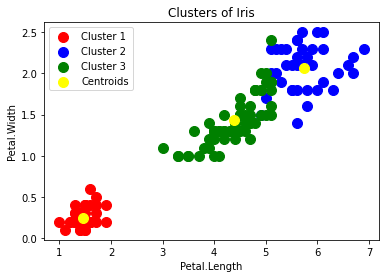

In [38]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')


plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


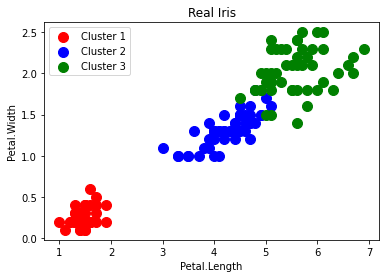

In [35]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target  == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[iris.target  == 1, 2], iris.data[iris.target  == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[iris.target  == 2, 2], iris.data[iris.target  == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Real Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [39]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/customers.csv')

In [40]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
X = dataset.iloc[:,[3,4]].values

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [44]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

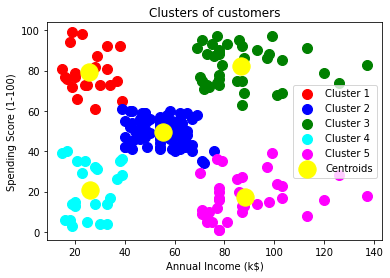

In [45]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
